# tipToe Dive into Machine Learning
> Implementing various mathods and tools particularly statsmodels from Wes Mckinney and notes from mlbook.explained.ai by Terrence Par and Jeremy Howard to Andrew Ng's Machine Learning course (CS229)

- toc: true
- branch: master
- badges: true
- comments: true
- author: Victor Worlanyo
- categories: [Advanced Beginner]

In [ ]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
!pip install statsmodels

# Supervised Learning - Linear Regression Approach

## Portland Housing Price Prediction Dataset
input variables, $x^{(i)}$: Living area ($x_1^{(i)}$), #bedrooms ($x_2^{(i)}$).\noutput variable, $y^{(i)}$: Price ($y^{(i)}$). `We only have one output variable`\ntraining set:\n $\{x^{(i)},y^{(i)};i=1,...,n\}$,\n  where $n=47$ 
```
len(ptlnd)
47
```

In [ ]:
ptlnd = pd.read_csv('ex1data2.txt',header=None)
# ptval = ptlnd.iloc[:,2].values
# ptindex = ptlnd.iloc[:,0].values

In [ ]:
# pt = pd.Series(ptval,index=ptindex)

## statsmodels
installing statsmodels and its dependencies\
patsy is a Python library for describing statistical models and building Design Matrices

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices

In [ ]:
ptlnd.columns

Int64Index([0, 1, 2], dtype='int64')

renaming columns

In [ ]:
ptlnd.rename(columns={0:'Living_area',1:'bedrooms',2:'Price'},inplace=True)

In [ ]:
ptlnd.columns

Index(['Living_area', 'bedrooms', 'Price'], dtype='object')

create two design matrices to fit estimated model (OLS)
- $y$ : matrix of endogenous variables (dependent), $N \times 1$ column data ~ Price
- $X$ : matrix exogenous varaibles (independent), $N \times 3$ column data ~ y-Intercept, Living Area, #bedrooms

In [ ]:

y, X = dmatrices('Price ~ Living_area + bedrooms',data=ptlnd,return_type='dataframe')

Design Matrices

In [ ]:
y.head()

,Price
0,399900.0
1,329900.0
2,369000.0
3,232000.0
4,539900.0


In [ ]:
X.head()

,Intercept,Living_area,bedrooms
0,1.0,2104.0,3.0
1,1.0,1600.0,3.0
2,1.0,2400.0,3.0
3,1.0,1416.0,2.0
4,1.0,3000.0,4.0


Model fit and summary
- Describe, fit and summarize model using Ordinary Least Squares (OLS)

In [ ]:
# describe model
mod = sm.OLS(y,X)

# fit model
res = mod.fit()

# Summarize model
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           2.43e-13
Time:                        19:56:42   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     8.96e+04   4.18e+04      2.145      

Extracting parameter estimates and $r^2$

In [ ]:
res.params

Intercept      89597.909543
Living_area      139.210674
bedrooms       -8738.019112
dtype: float64

In [ ]:
res.rsquared

0.7329450180289142

Applying Rainbow Test for Linearity
- The basic idea of the Rainbow test is that even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the "middle" of the data

In [ ]:
sm.stats.linear_rainbow(res)

(0.49348806706947385, 0.9499682609135575)

Draw a plot of partial regression for a set of regressors

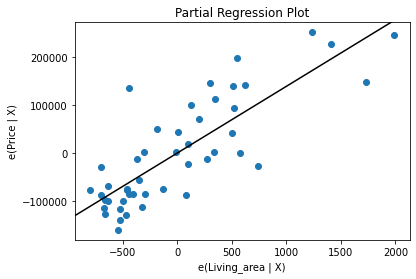

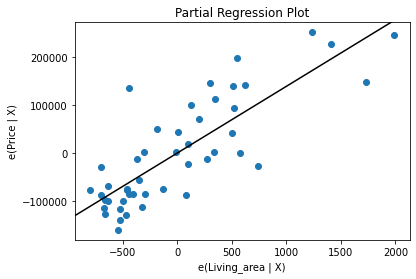

In [ ]:
sm.graphics.plot_partregress('Price','Living_area',['bedrooms'],data=ptlnd,obs_labels=False)

## sklearn

In [ ]:
ptlnd

,Living_area,bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Goal: given a dataset $\{x^{(i)},y^{(i)};i=1,...,n\}$, how can we produce a function $h$ such that $h(x) \approx y$ \
assumming $y$ is a linear function of $x$:\
$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2$:\
 where $x_0 = 1$ (y-intercept)





In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ptlnd.iloc[:,0:2],ptlnd.iloc[:,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([  139.21067402, -8738.01911233])

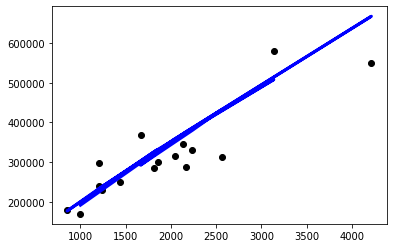

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

ptlnd_x_train = ptlnd.iloc[:,0:2][:-16]
ptlnd_x_test = ptlnd.iloc[:,0:2][-16:]

ptlnd_y_train =ptlnd.iloc[:,2][:-16]
ptlnd_y_test =ptlnd.iloc[:,2][-16:]

regr = linear_model.LinearRegression()
regr.fit(ptlnd_x_train,ptlnd_y_train)

ptlnd_y_pred = regr.predict(ptlnd_x_test)

plt.scatter(ptlnd_x_test.iloc[:,0],ptlnd_y_test,color='black')
plt.plot(ptlnd_x_test.iloc[:,0],ptlnd_y_pred,color='blue',linewidth=3)

In [ ]:
regr.coef_

array([ 141.97792925, 6371.72067488])

In [ ]:
r2_score(ptlnd_y_test,ptlnd_y_pred)

0.6790116553302931

### using cs229 dataset - portland housing

In [ ]:
print(f"Average rent is ${ptlnd['Price'].mean():.0f}")

Average rent is $340413


In [ ]:
bybed = ptlnd.groupby(['bedrooms']).mean().reset_index()
print(bybed[['bedrooms','Price']])

   bedrooms          Price
0         1  169900.000000
1         2  280866.666667
2         3  326403.920000
3         4  377449.785714
4         5  699900.000000


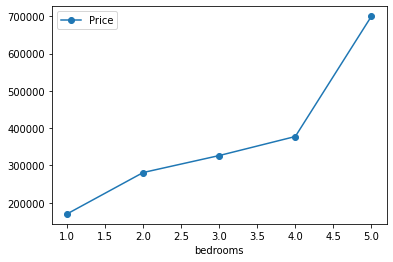

In [ ]:
import matplotlib.pyplot as plt
bybed.plot.line('bedrooms','Price',style='-o')
plt.show()

In [ ]:
X,y = ptlnd[['Living_area','bedrooms']],ptlnd['Price']

In [ ]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
unknown_xxx = [[1427,1],[5427,3],[2587,5]]

p = []
for i in range(len(unknown_xxx)):
    predicted_yyy = rf.predict([unknown_xxx[i]])
    p.extend(predicted_yyy)    
print(p)

[267410.0, 619920.0, 440559.6]


In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X)
e = mean_absolute_error(y,predictions)
ep = e*100/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$28151 average error; 8.27% error


In [ ]:
from sklearn.model_selection import train_test_split

X,y = ptlnd[['Living_area','bedrooms']],ptlnd['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)

validation_e = mean_absolute_error(y_test,rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100/y.mean()}% error")

$71396 average error; 20.97331224086911% error


In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

e = mean_absolute_error(y_test,rf.predict(X_test))
print(f"${e:.0f} average error; {e*100/y.mean():.2f}% error")

$70147 average error; 20.61% error


In [ ]:
!pip install rfpimp
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
I = importances(rf,X_test,y_test)
I

     |████████████████████████████████| 163kB 10.2MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10261 sha256=14a518caf23937ad89df86f9a79e8626e6852c596ab5b56208c73e7cfef8d924
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.5-cp36-none-any.whl size=35033 sha256=496e9d50e5f7b46ececab86f5eb18fb7dfeb6f8e6a76f7877a058d2d531b7a41
  Stored in directory: /root/.cache/pip/wheels/6e/28/de/a84563cfe761afd6c628e595590455412e26a6c4d587289d7b
Successfully built rfpimp stratx


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


,Importance
Feature,
Living_area,1.750672
bedrooms,-0.085395


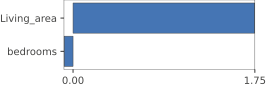

In [ ]:
plot_importances(I,color='#4575b4',vscale=1.8)

In [ ]:
rf.score(X_test,y_test)

0.2243195168360498

_A model is a combination of data structure, algorithm, and mathematics that captures the relationship described by a collection of (feature vector, target) pairs. The model records a condensation of the training data in its data structure, which can be anything from the unaltered training set (nearest neighbor model) to a set of decision trees (random forest model) to a handful of weights (linear model). This data structure comprises the parameters of the model and the parameters are computed from the training data._

## Decision Trees

In [ ]:
!pip install rfpimp

In [ ]:
!python prep-rent.py

Traceback (most recent call last):
  File "prep-rent.py", line 17, in <module>
    df = pd.read_json('train.json')
  File "/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py", line 199, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py", line 296, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/json/_json.py", line 618, in read_json
    result = json_reader.read()
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/json/_json.py", line 755, in read
    obj = self._get_object_parser(self.data)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/json/_json.py", line 777, in _get_object_parser
    obj = FrameParser(json, **kwargs).parse()
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/json/_json.py", line 886, in parse
    self._parse_no_numpy()
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/json/_json.py", line 1119, in _par

In [ ]:
import pandas as pd
rent = pd.read_csv('rent-ideal.csv')

FileNotFoundError: ignored

In [ ]:
print(f"Average rent is ${rent['price'].mean():.0f}")

Average rent is $3438


data aggregation

In [ ]:
bybaths = rent.groupby(['bathrooms']).mean().reset_index()
print(bybaths[['bathrooms','price']])

   bathrooms        price
0        0.0  3144.870000
1        1.0  3027.007118
2        1.5  4226.336449
3        2.0  5278.595739
4        2.5  6869.047368
5        3.0  6897.974576
6        3.5  7635.357143
7        4.0  7422.888889
8        4.5  2050.000000
9       10.0  3600.000000


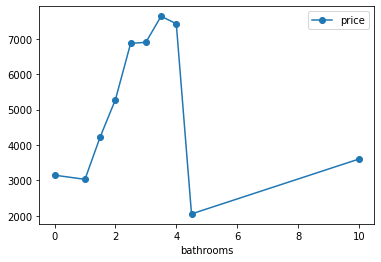

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
bybaths.plot.line('bathrooms','price',style='-o')
plt.show()

In [ ]:
## training a random forest model
X,y = rent[['bedrooms','bathrooms','latitude','longitude']], rent['price']

In [ ]:
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


## sklearn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

using a dummy exmaple

In [ ]:
unknown_x =[2,1,40.7957,-73.97]

In [ ]:
predicted_y = rf.predict([unknown_x])
print(predicted_y)

[4216.71680574]


using a list of dummy examples

In [ ]:
unknown_xx =[
             (2,1,40.7957,-73.97),(3,1,40.7957,-73.97),
             (2,500,40.7957,-73.97),(4,3,56,-1.4)
             
             ]

In [ ]:
p = []
for i in range(len(unknown_xx)):
    predicted_yy = rf.predict([unknown_xx[i]])
    p.extend(predicted_yy)
print(p)

[4216.716805738545, 4722.982142857143, 6174.8, 2660.0]


testing (best fit)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X)
e = mean_absolute_error(y,predictions)
ep = e*100.0/y.mean() # training error
print(f"${e:.0f} average error; {ep:.2f}% error")

$189 average error; 5.51% error


'dimensionality reduction'

In [ ]:
X, y = rent[['latitude','longitude']], rent['price']
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)
location_e = mean_absolute_error(y,rf.predict(X))
location_ep = location_e*100.0/y.mean()
print(f"${location_e:.0f} average error; {location_ep:.2f}% error")

$519 average error; 15.09% error


In [ ]:
reduction = ep*100/location_ep
print(f"{reduction:.2f}% reduction in accuracy when bedrooms and bathrooms features are dropped")

36.51% reduction in accuracy when bedrooms and bathrooms features are dropped


generalization

In [ ]:
from sklearn.model_selection import train_test_split

X, y = rent[['bedrooms','bathrooms','latitude','longitude']], rent['price']
# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)

validation_e = mean_absolute_error(y_test,rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$297 average error; 8.64% error


In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

e = mean_absolute_error(y_test,rf.predict(X_test))
print(f"${e:.0f} average error; {e*100.0/y.mean():.2f}% error")

$290 average error; 8.43% error


feature importance

In [ ]:
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
I = importances(rf,X_test,y_test)
I 

,Importance
Feature,
bedrooms,0.523889
longitude,0.489262
latitude,0.451691
bathrooms,0.444979


feature importance graphs

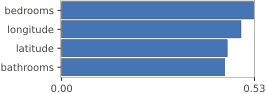

In [ ]:
plot_importances(I,color='#4575b4',vscale=1.8)

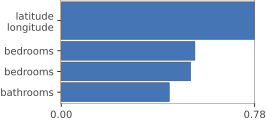

In [ ]:
I  =importances(rf,X_test,y_test,
                features=['bedrooms','bedrooms',['latitude','longitude']])
plot_importances(I,color='#4575b4',vscale=1.8)

# Classification 
### Predicting Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
df = pd.DataFrame(X,columns=cancer.feature_names)

In [ ]:
# features of interest
features = ['radius error','texture error','concave points error',
            'symmetry error', 'worst texture','worst smoothness',
            'worst symmetry']
df = df[features]
print('target[0:30] = ',y[0:30])
df.head()

target[0:30] =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=.15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators=300)
cl.fit(X_train,y_train)
validation_e = cl.score(X_test,y_test)
print(f"{validation_e*100:.2f}% correct")

97.67% correct


In [ ]:
!git clone https://github.com/jadeyee/r2d3-part-1-data.git

Cloning into 'r2d3-part-1-data'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.


In [ ]:
import pandas as pd

ParserError: ignored

In [ ]:
!pip install gspread-pandas

In [ ]:
from gspread_pandas import Spread, Client

In [ ]:
!pwd

/content


# Predicting BC

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
df = pd.DataFrame(X,columns=cancer.feature_names)
type(cancer)

sklearn.utils.Bunch

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
features = ['radius error','texture error','concave points error','symmetry error','worst texture','worst smoothness','worst symmetry']
df = df[features]
print('target[0:30]=',y[0:30])
df.head()

target[0:30]= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


splitting dataset into training and validation (85% - 15%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=.15)

training and testing 

In [ ]:
cl = RandomForestClassifier(n_estimators=300)
cl.fit(X_train,y_train)
validation_e = cl.score(X_test,y_test)
print(f'{validation_e*100:.2f}% correct')

95.35% correct


feature importance for classifiers

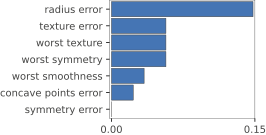

In [ ]:
from rfpimp import *
I = importances(cl,X_test,y_test)
plot_importances(I,color='#4575b4',vscale=1.4)
# therefore the pathologist should focus more on radius error 

classifying handwritten digits

In [ ]:
# loading target data
addr640 = pd.read_csv('640.csv')

In [ ]:
print(addr640.digit.values)

[6 4 0]


In [ ]:
addr640 = addr640.drop('digit',axis=1)

<class 'numpy.ndarray'>


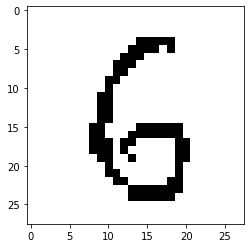

In [ ]:
six_img_as_row = addr640.iloc[0].values
img28x28 = six_img_as_row.reshape(28,28)
print(type(six_img_as_row))
plt.imshow(img28x28,cmap='binary')
plt.show()

28x28 pixel image

In [ ]:
six_img_as_row[six_img_as_row>0] = 1
six_img_as_row = six_img_as_row.astype(int)
img28x28 = six_img_as_row.reshape(28,28)
s = str(img28x28).replace(' ','')
print(s)

<class 'numpy.ndarray'>
[[0000000000000000000000000000]
[0000000000000000000000000000]
[0000000000000000000000000000]
[0000000000000000000000000000]
[0000000000000011111000000000]
[0000000000000111101000000000]
[0000000000001110000000000000]
[0000000000011100000000000000]
[0000000000011000000000000000]
[0000000000110000000000000000]
[0000000000100000000000000000]
[0000000001100000000000000000]
[0000000001100000000000000000]
[0000000001100000000000000000]
[0000000001100000000000000000]
[0000000011000011111100000000]
[0000000011000111111100000000]
[0000000011101100000110000000]
[0000000011101000000110000000]
[0000000001100100000110000000]
[0000000000100000000100000000]
[0000000000110000000100000000]
[0000000000011000001100000000]
[0000000000000111111100000000]
[0000000000000111111000000000]
[0000000000000000000000000000]
[0000000000000000000000000000]
[0000000000000000000000000000]]


In [ ]:
print(img28x28)
print(six_img_as_row)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

load training data

In [ ]:
digits =pd.read_csv('mnist-10k-sample.csv')
images = digits.drop('digit',axis=1)
targets = digits['digit']

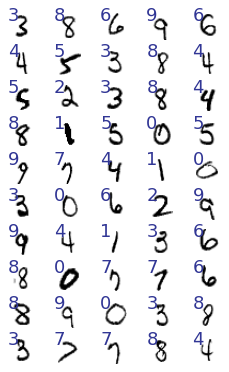

In [ ]:
fig, axes = plt.subplots(10,5,figsize=(4,6.5))

for i,ax in enumerate(axes.flat):
    img_as_row = images.iloc[i].values
    img28x28 = img_as_row.reshape(28,28)
    ax.axis('off')
    ax.imshow(img28x28,cmap='binary')
    ax.text(0,8,targets[i],color='#313695',fontsize=18)
plt.show()

classifying test digits

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators=900,n_jobs=1)
cl.fit(images,targets)
pred = cl.predict(addr640)
print(pred)

[6 7 0]


investigating error

([array([0.091, 0.044, 0.094, 0.051, 0.127, 0.166, 0.22 , 0.047, 0.09 ,
       0.07 ])], 'Predicted digit is', 6)


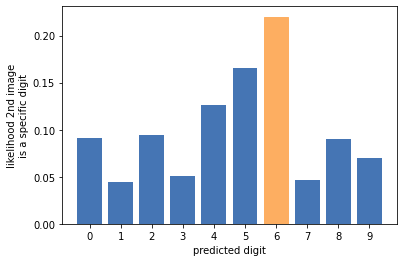

([array([0.023, 0.138, 0.063, 0.139, 0.104, 0.084, 0.064, 0.249, 0.033,
       0.101])], 'Predicted digit is', 7)


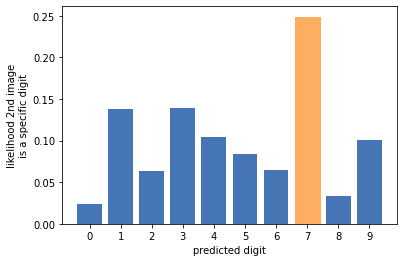

([array([0.252, 0.032, 0.102, 0.088, 0.063, 0.137, 0.109, 0.147, 0.021,
       0.049])], 'Predicted digit is', 0)


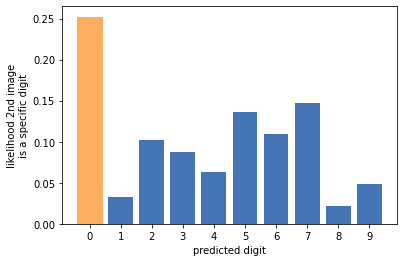

In [ ]:
import numpy as np
np.set_printoptions(precision=3)
# pb = []
for i in range(3):
    digit_values = range(10)
    prob = cl.predict_proba(addr640)
    prob_for_2nd_digit = prob[i]
    pred_digit = np.argmax(prob_for_2nd_digit)
    a = [prob_for_2nd_digit], 'Predicted digit is', pred_digit
    print(a)
    # pb.extend(a)
    # pb2.append(pred_digit)

    pred_digit = np.argmax(prob_for_2nd_digit)
    bars = plt.bar(digit_values,prob_for_2nd_digit,color='#4575b4')
    bars[pred_digit].set_color('#fdae61')
    plt.xlabel('predicted digit')
    plt.xticks(digit_values)
    plt.ylabel('likelihood 2nd image\nis a specific digit')
    plt.show()
# print(pb)

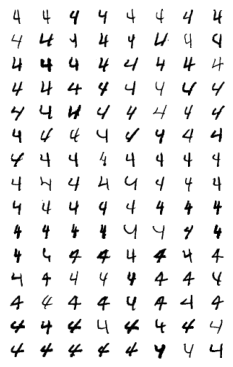

In [ ]:
fours = images[targets==4]

fig,axes = plt.subplots(15,8,figsize=(4,6.5))
for i,ax in enumerate(axes.flat):
    img = fours.iloc[i,:].values.reshape(28,28)
    ax.axis('off')
    ax.imshow(img,cmap='binary')

using a linear model for performance comparism

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(images,targets,test_size=.2)

cl = RandomForestClassifier(n_estimators=900,n_jobs=-1)
cl.fit(X_train,y_train)
rfaccur = cl.score(X_test,y_test)
print(rfaccur)

0.9575


In [ ]:
from sklearn.linear_model import LogisticRegression

# create linear model
lm = LogisticRegression( solver='newton-cg',multi_class='multinomial')
lm.fit(X_train,y_train)

lmaccur =lm.score(X_test,y_test)
print(lmaccur)

0.91


rf requires a lot of memory than the linear model

In [ ]:
ntrees = cl.n_estimators
nnodes = sum([cl.estimators_[i].tree_.node_count for i in range(ntrees)])
print(f'{nnodes:,}')

1,700,468


In [ ]:
import numpy as np
X_train =np.array([1,2,3,4,5]).reshape(5,1)
y_train =np.array([1,2,3,4,5])
X_test = np.array([6]).reshape(1,1)

linear regression model predicting target value 6

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('y =', lm.predict(X_test))
# linear relationship

y = [6.]


In [ ]:
lm.fit(X_train,y_train).coef_

array([1.])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
print('y =', rf.predict(X_test))

y = [4.57]


In [ ]:
!python prep-rent.py

Created rent.csv
Created rent-ideal.csv
